### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. URL 찾기

In [3]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [4]:
# 2. request > response : str(html)

In [5]:
response = requests.get(url)
response

<Response [200]>

In [6]:
# 3. bs > DataFrame

In [7]:
dom = BeautifulSoup(response.text, "html.parser")

In [8]:
# select items
elements = dom.select("#gBestWrap > div.best-list > ul > li")
len(elements)

200

In [9]:
element = elements[0]

In [10]:
# select item data
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img").get("data-original"),
    "o_price": element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': '[베베숲]NEW 베베숲 프라임 70매 캡 20팩 신규런칭/고평량 도톰한 아기물티슈/7년 연속 판매 1위 베베숲',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=3039555146&ver=20230829',
 'img': None,
 'o_price': '정가42,790원',
 's_price': '할인가30,570원 28%'}

In [11]:
# make DataFrame
data = []
for element in elements:
    data.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": "http:" + element.select_one("img").get("src"),
        "o_price": element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
    })
df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o_price,s_price
198,[스타벅스]스타벅스 카페라떼 컵커피 200mlx20컵+아이스포장,http://item.gmarket.co.kr/Item?goodscode=15521...,http://gdimg.gmarket.co.kr/1552146498/still/30...,,"할인가32,900원"
199,찾아도 찾아도 끝판왕 1000개 숨은 그림찾기 5종세트 선택구매,http://item.gmarket.co.kr/Item?goodscode=29799...,http://gdimg.gmarket.co.kr/2979976232/still/30...,"정가40,000원","할인가36,000원 10%"


In [12]:
df.head()

,title,link,img,o_price,s_price
0,[베베숲]NEW 베베숲 프라임 70매 캡 20팩 신규런칭/고평량 도톰한 아기물티슈/...,http://item.gmarket.co.kr/Item?goodscode=30395...,http://gdimg.gmarket.co.kr/3039555146/still/30...,"정가42,790원","할인가30,570원 28%"
1,[크리넥스](15%+클럽12% 쿠폰적용가 11180) 크리넥스 안심클래식 키친타올...,http://item.gmarket.co.kr/Item?goodscode=27081...,http://gdimg.gmarket.co.kr/2708176714/still/30...,"정가21,420원","할인가15,300원 28%"
2,[프레시누리]청정우 홍두깨살 바로구이 육전용 250gX3팩,http://item.gmarket.co.kr/Item?goodscode=22541...,http://gdimg.gmarket.co.kr/2254199961/still/30...,"정가26,500원","할인가18,500원 30%"
3,[아디다스](대전신세계)[New Performance] 아디다스 갤럭시 13종 택1,http://item.gmarket.co.kr/Item?goodscode=27404...,http://gdimg.gmarket.co.kr/2740413857/still/30...,"정가48,500원","할인가37,640원 22%"
4,[엘에이]올인원 캡슐세탁세제 (1+2앵콜)엘에이 핑크/그린 30개입x3 (총 90개입),http://item.gmarket.co.kr/Item?goodscode=25153...,http://gdimg.gmarket.co.kr/2515395333/still/30...,"정가31,500원","할인가22,500원 28%"


In [13]:
# 4. download image

In [14]:
# make directory
import os
path = 'data'
if not os.path.exists(path):
    os.makedirs(path)

In [15]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


In [16]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/3039555146/still/300?ver=20230829


In [17]:
# download image

In [18]:
response = requests.get(img_link)
response

<Response [200]>

In [19]:
with open(f"{path}/test.png", "wb") as file:
    file.write(response.content)

In [20]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


In [21]:
from PIL import Image as pil

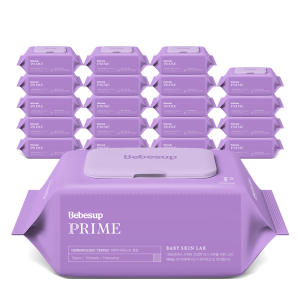

In [22]:
pil.open(f"{path}/test.png")

In [23]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"{path}/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [24]:
%ls data

000.png   001.png   002.png   003.png   004.png   test.png


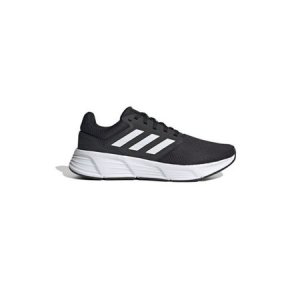

In [25]:
pil.open(f"{path}/003.png")